## Question 2.1

Given a analog signal $x(t) = 2sin(4 \pi t) + 5cos(8 \pi t)$, sample it, and use DFT (FFT) to perform the signal spectrum analysis.

1. Determine the minimum sample frequency and the minimum number of sample points.
2. If we sample the signal with $t = 0.01n(n = 0 : N-1)$, how many sample points are needed at least?
3. Draw the signal amplitude spectrum of the N point DFT result with the DFT points $N = 50,100$, discuss the result of the amplitude spectrum.
4. If N is $N = 64$ and $N = 60$ respectively, can we distinguish all of the frequency components of the signal?
5. Under the condition of 3 and 4, perform the zero padding of FFT, and analyze the results.
6. Under the condition of not satisfying the minimum sample points, perform the zero padding of FFT, and see if two frequency components can be distinguished.

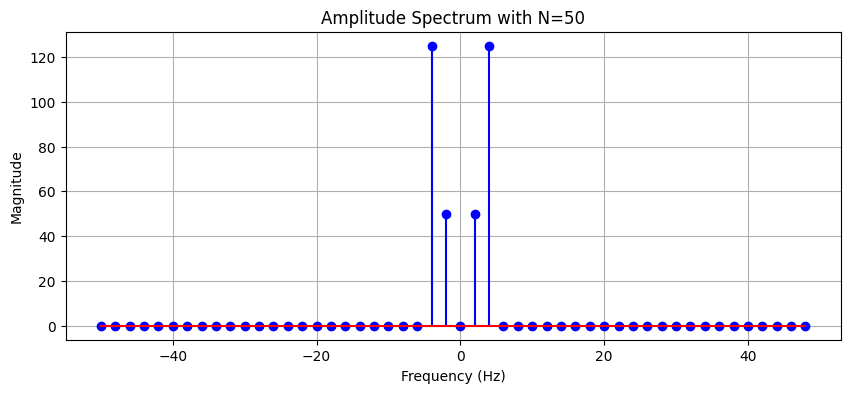

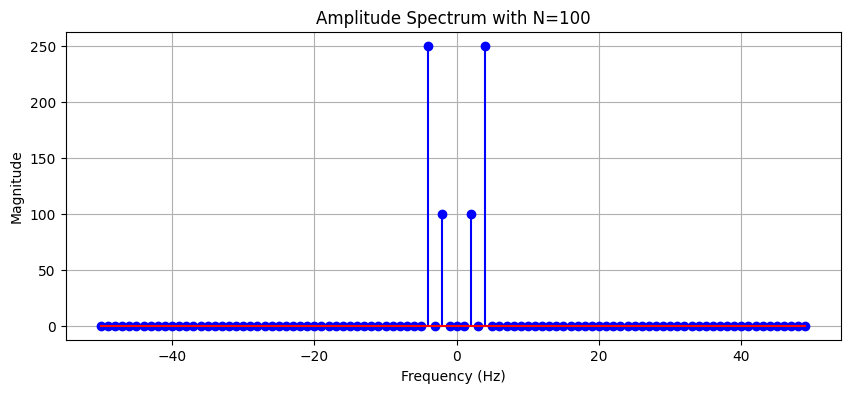

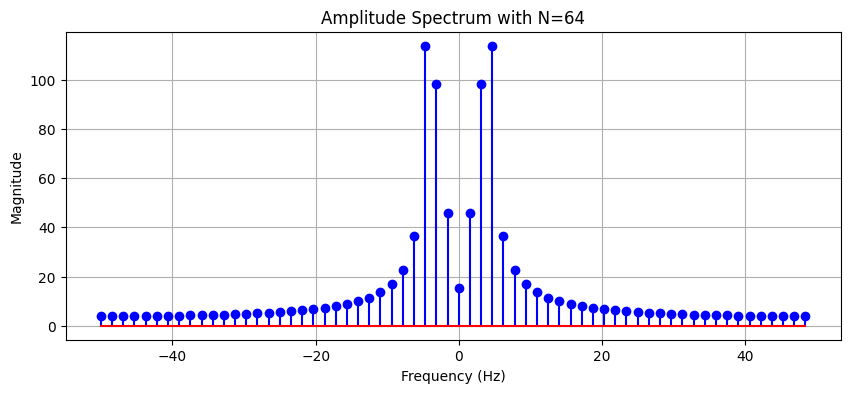

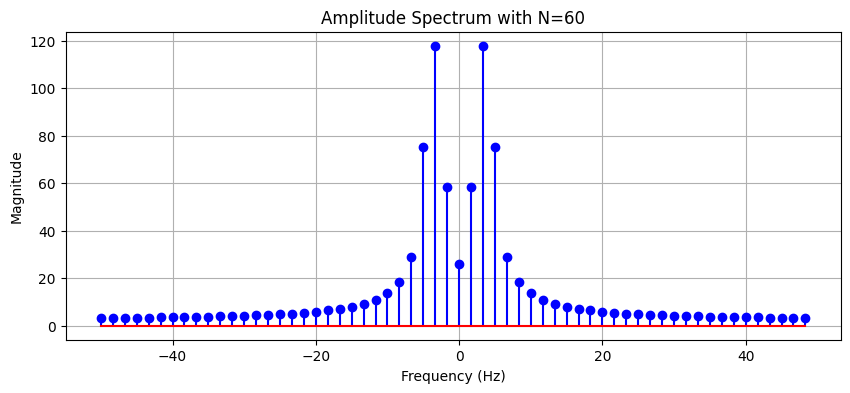

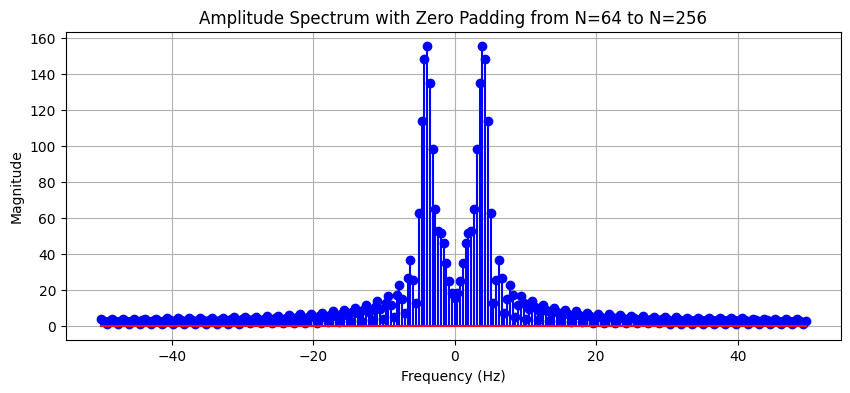

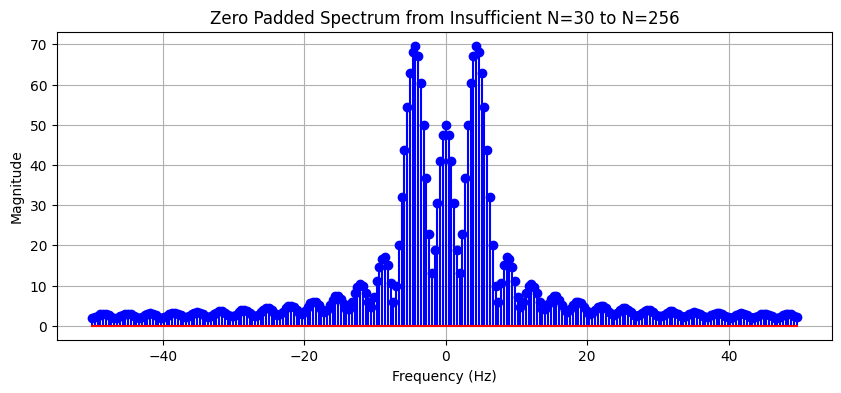

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift

# Define the signal function
def x(t):
    return 2 * np.sin(4 * np.pi * t) + 5 * np.cos(8 * np.pi * t)

# Sample the signal
def sample_signal(fs, T_end, N=None):
    dt = 1 / fs
    if N is None:
        N = int(T_end / dt)
    t = np.arange(0, N) * dt
    x_samples = x(t)
    return t, x_samples, N

# Compute FFT and frequency bins
def compute_fft(x_samples, fs, N):
    X_fft = fft(x_samples, n=N)
    X_fft = fftshift(X_fft)
    freq = fftshift(np.fft.fftfreq(N, d=1/fs))
    return freq, np.abs(X_fft)

# Plot amplitude spectrum
def plot_spectrum(freq, X_fft, title):
    plt.figure(figsize=(10, 4))
    plt.stem(freq, X_fft, linefmt='b-', markerfmt='bo', basefmt='r-')
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

# Settings
fs = 100  # Sampling frequency
T_end = 1  # End time for sampling
sample_points_list = [50, 100, 64, 60]  # Different DFT points

# Process and plot for different sample points without zero padding
for N in sample_points_list:
    t, x_samples, N_used = sample_signal(fs, T_end, N)
    freq, X_fft = compute_fft(x_samples, fs, N_used)
    plot_spectrum(freq, X_fft, f'Amplitude Spectrum with N={N}')

# Process and plot with zero padding
N_original = 64
N_zero_padded = 256
t, x_samples, _ = sample_signal(fs, T_end, N_original)
freq_padded, X_fft_padded = compute_fft(x_samples, fs, N_zero_padded)
plot_spectrum(freq_padded, X_fft_padded, f'Amplitude Spectrum with Zero Padding from N={N_original} to N={N_zero_padded}')

# Experiment with insufficient samples and zero padding
N_insufficient = 30
N_padded_insufficient = 256
t_insufficient, x_samples_insufficient, _ = sample_signal(fs, T_end, N_insufficient)
freq_insuff_padded, X_fft_insuff_padded = compute_fft(x_samples_insufficient, fs, N_padded_insufficient)
plot_spectrum(freq_insuff_padded, X_fft_insuff_padded, f'Zero Padded Spectrum from Insufficient N={N_insufficient} to N={N_padded_insufficient}')

1. Determining Minimum Sampling Frequency and Minimum Sample Points

   The given signal is $x(t) = 2\sin(4 \pi t) + 5\cos(8 \pi t)$. To analyze the frequency components:
   - The frequency of $2\sin(4 \pi t)$ is 2 Hz (since $\omega = 4\pi$ radians per second corresponds to $f = \frac{4\pi}{2\pi} = 2$ Hz).
   - The frequency of $5\cos(8 \pi t)$ is 4 Hz (since $\omega = 8\pi$ radians per second corresponds to $f = \frac{8\pi}{2\pi} = 4$ Hz).

   **Nyquist Frequency**: To avoid aliasing, the sampling frequency ($f_s$) must be at least twice the highest frequency present in the signal, i.e., $f_s \geq 2 \times 4$ Hz = 8 Hz.

   **Minimum Sample Frequency**: Thus, the minimum sampling frequency should be 8 Hz, but typically it's set higher to ensure a margin, e.g., 10 Hz or more.

   **Minimum Number of Sample Points**: To resolve both frequencies distinctly in the discrete Fourier transform (DFT), the sample points should span at least one complete cycle of the lowest frequency. For 2 Hz, the period is 0.5 seconds, thus at least 5 sample points (if sampling at 10 Hz) are essential to cover one period.

2. Number of Sample Points with $t = 0.01n$

   If $t = 0.01n$, the sampling frequency is $f_s = \frac{1}{0.01} = 100$ Hz. This is sufficient to avoid aliasing.

   To ensure capturing the signal characteristics, especially for DFT analysis, it's typically desired to sample at least a few cycles of the highest frequency component. Since the highest frequency is 4 Hz, sampling across at least 1 second (100 samples) would be a conservative choice to ensure a reasonable resolution in the frequency domain.

3. Amplitude Spectrum with $N = 50$ and $N = 100$

   When performing a DFT:

   - **$N = 50$**: The frequency resolution is $\frac{f_s}{N} = \frac{100}{50} = 2$ Hz.
   - **$N = 100$**: The frequency resolution is $\frac{100}{100} = 1$ Hz.

   **Result Discussion**: With $N = 50$, each frequency bin represents 2 Hz, thus the 2 Hz and 4 Hz components may appear in distinct bins. However, with $N = 100$, the resolution improves, clearly separating the two frequency components.

4. Frequency Components Distinguishability at $N = 64$ and $N = 60$

   - **$N = 64$**: Resolution is $\frac{100}{64} \approx 1.5625$ Hz.
   - **$N = 60$**: Resolution is $\frac{100}{60} \approx 1.6667$ Hz.

   Both configurations should distinguish the 2 Hz and 4 Hz components as their separation is greater than the resolution in both cases.

5. Zero Padding of FFT

   Zero padding involves appending zeros to the signal before performing FFT to increase the DFT size, enhancing the frequency resolution and interpolating between the DFT points. This does not increase the actual information but makes the spectrum smoother and easier to interpret.

6. Zero Padding without Satisfying Minimum Sample Points

   If the number of sample points is below the minimum required to capture all frequencies distinctly (e.g., sampling less than one period of the lowest frequency or at a low resolution), zero padding can still be used in FFT to improve the visualization of spectral components but cannot create new information. Thus, if the sample points are too few, zero padding will not enable the clear distinction of closely spaced frequency components.

## Question 2.2

Assume the linear modulation signal of radar is $h(t) = e^{j2 \pi \mu t^2}$, $\mu = 5 \times 10^{13}$, sampling rate $f_{s} = 2 \times 10^9$, sampling points $N = 20000$. Echo signal $s(t) = h(t-\tau_{1})+h(t-\tau_{2})$, $\tau_{1} = 10^{-6}$, $\tau_{2} = 1.1 \times 10^{-6}$.

1. Draw the frequency spectrum of the echo signal $h(t)$.
2. Utilize the time delay property of the DFT to generate $s(t)$, and compare the results with the direct formulation in the time domain or the frequency domain (then change to the time domain) whether the results are consistent.
3. The consequence of the matching filter is $y(t) = s(t)*h^{*}(-t)$, ("*" refers the linear convolution). Solve the $y(t)$ using the direct linear convolution method or the convolution theorem of the DFT. Compare the results of the two methods, and record the time consumed by the two methods (use tic or toc command).
4. Draw the frequency spetrum of the $y(t)$.

Time-Domain Convolution Duration: 3.50445s
Frequency-Domain Convolution Duration: 0.00214s


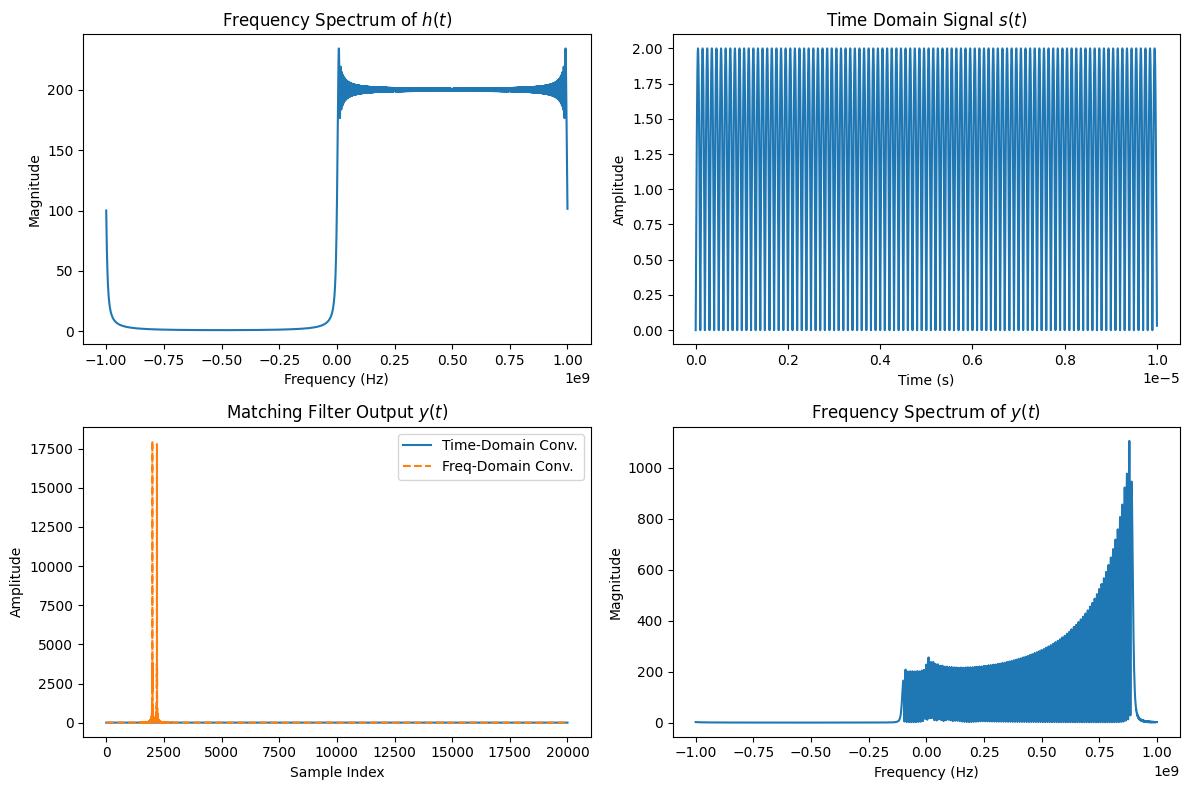

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftshift
import time

# Constants
mu = 5e13
fs = 2e9   # Sampling rate
N = 20000  # Number of samples
t = np.arange(N) / fs
tau_1 = 1e-6
tau_2 = 1.1e-6

# Define h(t)
h_t = np.exp(1j * 2 * np.pi * mu * t**2)

# 1. Frequency Spectrum of h(t)
H_f = fft(h_t)
frequencies = np.fft.fftfreq(N, d=1/fs)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(fftshift(frequencies), fftshift(np.abs(H_f)))
plt.title("Frequency Spectrum of $h(t)$")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

# 2. Generate s(t) using DFT Time Delay Property
h_t_delayed1 = np.exp(1j * 2 * np.pi * mu * (t - tau_1)**2)
h_t_delayed2 = np.exp(1j * 2 * np.pi * mu * (t - tau_2)**2)
s_t = h_t_delayed1 + h_t_delayed2

plt.subplot(2, 2, 2)
plt.plot(t, np.abs(s_t))
plt.title("Time Domain Signal $s(t)$")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# 3. Convolution using both methods
# Time-domain method
start_time = time.time()
y_t_td = np.convolve(s_t, np.conj(h_t[::-1]), 'full')
td_duration = time.time() - start_time

# Frequency-domain method
start_time = time.time()
Y_f = fft(s_t) * np.conj(fft(h_t))
y_t_fd = ifft(Y_f)
fd_duration = time.time() - start_time

plt.subplot(2, 2, 3)
plt.plot(np.abs(y_t_td[:N]), label='Time-Domain Conv.')
plt.plot(np.abs(y_t_fd), label='Freq-Domain Conv.', linestyle='dashed')
plt.legend()
plt.title("Matching Filter Output $y(t)$")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

# Print durations
print(f"Time-Domain Convolution Duration: {td_duration:.5f}s")
print(f"Frequency-Domain Convolution Duration: {fd_duration:.5f}s")

# 4. Frequency Spectrum of y(t)
Y_f_plot = fft(y_t_td[:N])
plt.subplot(2, 2, 4)
plt.plot(fftshift(frequencies), fftshift(np.abs(Y_f_plot)))
plt.title("Frequency Spectrum of $y(t)$")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

To tackle this problem, we'll implement a Python script to simulate the signal processing operations described. We'll use libraries such as NumPy for mathematical operations and FFT, and Matplotlib for plotting.

1. Frequency Spectrum of $h(t)$

   The signal $h(t) = e^{j2 \pi \mu t^2}$ is a chirp signal where $\mu$ controls the rate of frequency increase. We will compute its frequency spectrum using the Fast Fourier Transform (FFT).

2. Generate $s(t)$ Using DFT Time Delay Property

   We'll create the echo signal by delaying $h(t)$ to simulate $\tau_1$ and $\tau_2$ and compare the DFT time-delay method against direct time-domain synthesis.

3. Matching Filter Output $y(t)$

   We'll compute $y(t) = s(t) * h^{*}(-t)$ using both the direct convolution method in time-domain and using the convolution theorem (FFT-based approach) and compare their computational efficiencies.

4. Frequency Spectrum of $y(t)$

   Finally, we'll plot the frequency spectrum of $y(t)$.